In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
im_bgr = cv2.imread('hedgehog.jpg')
im_rbg = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
im = im_rbg.astype(np.float)

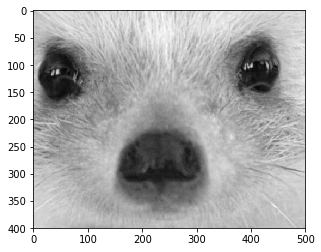

In [3]:
roi = im[500:900, 800:1300]
roi = roi[:,:,0]
plt.imshow(roi.astype(int), cmap='gray')

In [4]:
from utils.super_resolution_utils import createLRrSamples

In [9]:
q = 4
nb_lr_im = 16

In [10]:
lr_images = createLRrSamples(roi, nb_lr_images=nb_lr_im, q=q, noise_variance=5)

In [13]:
hr_im = np.zeros((lr_images[0].shape[0]*q, lr_images[0].shape[1]*q))

$$
E(I) = \frac{1}{p}\sum_{k=1}^p{|| D_k B_k M_k I - Y_k ||^2} \\
\nabla E(I) = \frac{1}{p}\sum_{k=1}^p{(D_k B_k M_k)^T(D_k B_k M_k I - Y_k)}\\
\nabla E(I) = \frac{1}{p}\sum_{k=1}^p{(I - M_k^T B_k^T D_k^T Y_k)}
$$

In [30]:
def upsample(lr_im, q):
    
    # Upsampling (D^T)
    temp_hr = np.zeros((lr_im.shape[0]*q, lr_im.shape[1]*q))
    for i in range(lr_im.shape[0]):
        for j in range(lr_im.shape[1]):
            temp_hr[q*i, q*j] = lr_im[i,j]
    
    # Unblurring (B^T)
    temp_hr = 1*temp_hr
    
    # Unwarping (M^T)
    temp_hr = 1*temp_hr

    return temp_hr

In [56]:
hr_im = np.zeros_like(roi)

for iteration in range(100):
    gradE_df = np.zeros_like(hr_im)
    for k in range(nb_lr_im):
        gradE_df += hr_im - upsample(lr_images[k], q=q)
    gradE_df /= nb_lr_im

    hr_im -= gradE_df
    
    if iteration % 10 ==0:
        cv2.imwrite('test/hr_'+str(iteration)+'.png', hr_im)